# Test For `DataDrifChecher`-`pydrift` 

We're going to test how it works with the famous titanic dataset

# Dependencies

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from pydrift import DataDriftChecker
from pydrift.constants import PATH_DATA, RANDOM_STATE

# Read Data 

In [2]:
df_titanic = pd.read_csv(PATH_DATA / 'titanic.csv')

# Constants 

In [3]:
DATA_LENGTH = df_titanic.shape[0]
TARGET = 'Survived'

# Data Split

We drop `PassengerId`, `Name`, `Cabin`, `Ticket` because are features with high cardinality (passenger related variables)

50% sample will give us a non-drift problem

In [4]:
X = df_titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket', TARGET])
y = df_titanic[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.5, random_state=RANDOM_STATE, stratify=y
)

# Instanciate `pydrift.DataDriftChecker` 

In [5]:
data_drift_checker_ok = DataDriftChecker(X_train, X_test)

# Test  `ml_model_can_discriminate` Feature

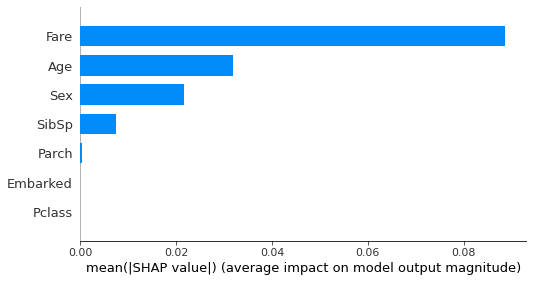

No drift found in discriminative model step

AUC drift check model: 0.50
AUC threshold: .5 ± 0.10


In [6]:
data_drift_checker_ok.ml_model_can_discriminate();

# Test Numerical Features 

In [7]:
data_drift_checker_ok.check_numerical_columns();

No drift found in numerical columns check step



# Test Categorical Features 

In [8]:
data_drift_checker_ok.check_categorical_columns();

No drift found in categorical columns check step



# Same But  Make It Drift

`pydrift` tells you that the problem is in `Sex` feature (as is obviously in this example)

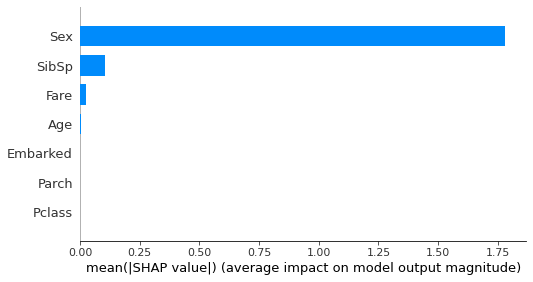

Drift found in discriminative model step, take a look on the most discriminative features (plots when minimal is set to False)

AUC drift check model: 1.00
AUC threshold: .5 ± 0.10


In [9]:
X_women = X[X['Sex'] == 'female']
X_men = X[X['Sex'] == 'male']

data_drift_checker_ko = DataDriftChecker(X_women, X_men)
data_drift_checker_ko.ml_model_can_discriminate();

# Test Numerical Features 

In [10]:
data_drift_checker_ko.check_numerical_columns();

Drift found in numerical columns check step, take a look on the variables that are drifted, if one is not important you could simply delete it, otherwise check the data source



/home/scalderp/PycharmProjects/Data-And-Model-Drift-Checker/pydrift/core/drift_checker.py:362: UserWarning:

Features drifted (numerical): Pclass, Age, SibSp, Parch, Fare



# Test Categorical Features 

In [11]:
data_drift_checker_ko.check_categorical_columns();

Drift found in categorical columns check step, take a look on the variables that are drifted, if one is not important you could simply delete it, otherwise check the data source



/home/scalderp/PycharmProjects/Data-And-Model-Drift-Checker/pydrift/core/drift_checker.py:452: UserWarning:

Features drifted (categorical): Sex, Embarked



# All Drifted Features 

In [12]:
data_drift_checker_ko.drifted_features

{'Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'}

# Same But  Make It Drift With Various Features

`pydrift` detects that the problem is but `Pclass` and `Fare` feature (again obviously because this is an example)

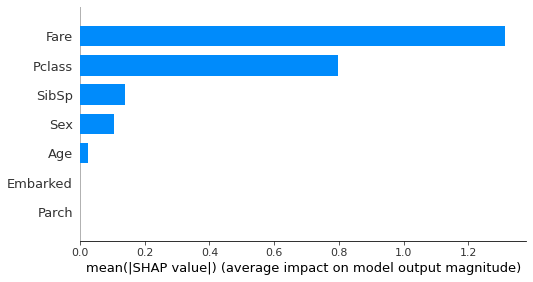

Drift found in discriminative model step, take a look on the most discriminative features (plots when minimal is set to False)

AUC drift check model: 1.00
AUC threshold: .5 ± 0.10


In [13]:
mask = (X['Pclass'] > 1) & (X['Fare'] > 10)

X_mask = X[mask]
X_unmask = X[~mask]

data_drift_checker_ko_2 = DataDriftChecker(X_mask, X_unmask)
data_drift_checker_ko_2.ml_model_can_discriminate();

# Test Numerical Features 

In [14]:
data_drift_checker_ko_2.check_numerical_columns();

Drift found in numerical columns check step, take a look on the variables that are drifted, if one is not important you could simply delete it, otherwise check the data source



/home/scalderp/PycharmProjects/Data-And-Model-Drift-Checker/pydrift/core/drift_checker.py:362: UserWarning:

Features drifted (numerical): Pclass, Age, SibSp, Parch, Fare



# Test Categorical Features 

In [15]:
data_drift_checker_ko_2.check_categorical_columns();

Drift found in categorical columns check step, take a look on the variables that are drifted, if one is not important you could simply delete it, otherwise check the data source



/home/scalderp/PycharmProjects/Data-And-Model-Drift-Checker/pydrift/core/drift_checker.py:452: UserWarning:

Features drifted (categorical): Sex, Embarked



# All Drifted Features 

In [16]:
data_drift_checker_ko_2.drifted_features

{'Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'}